In [248]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [249]:
FinalMerge = pd.read_excel('../2progs/FinalMerge.xlsx',sheet_name='Sheet1',index_col = 0)

In [250]:
#converting to floats
FinalMerge['number_dwellings'] = FinalMerge['number_dwellings'].astype(float)
FinalMerge['number_habitablerooms'] = FinalMerge['number_habitablerooms'].astype(float)
FinalMerge['share_toilet_Yes'] = FinalMerge['share_toilet_Yes'].astype(float)
FinalMerge['own_radio_Yes'] = FinalMerge['own_radio_Yes'].astype(float)
FinalMerge['own_television_Yes'] = FinalMerge['own_television_Yes'].astype(float)
FinalMerge['own_satelitedish_Yes'] = FinalMerge['own_satelitedish_Yes'].astype(float)
FinalMerge['own_smartphone_Yes'] = FinalMerge['own_smartphone_Yes'].astype(float)
FinalMerge['own_refrigerator_Yes'] = FinalMerge['own_refrigerator_Yes'].astype(float)
FinalMerge['own_table_Yes'] = FinalMerge['own_table_Yes'].astype(float)
FinalMerge['own_bed_Yes'] = FinalMerge['own_bed_Yes'].astype(float)
FinalMerge['own_mattress_Yes'] = FinalMerge['own_mattress_Yes'].astype(float)
FinalMerge['own_mosquitonet_Yes'] = FinalMerge['own_mosquitonet_Yes'].astype(float)
FinalMerge['own_mattress_Yes'] = FinalMerge['own_mattress_Yes'].astype(float)
FinalMerge['own_fan_Yes'] = FinalMerge['own_fan_Yes'].astype(float)
FinalMerge['own_bicycle_Yes'] = FinalMerge['own_bicycle_Yes'].astype(float)
FinalMerge['own_motorcycle_Yes'] = FinalMerge['own_motorcycle_Yes'].astype(float)
FinalMerge['own_generator_Yes'] = FinalMerge['own_generator_Yes'].astype(float)
FinalMerge['own_solarpanels_Yes'] = FinalMerge['own_solarpanels_Yes'].astype(float)
FinalMerge['own_kerosenestove_Yes'] = FinalMerge['own_kerosenestove_Yes'].astype(float)
FinalMerge['own_charcoaljiko_Yes'] = FinalMerge['own_charcoaljiko_Yes'].astype(float)
FinalMerge['own_wheelbarrow_Yes'] = FinalMerge['own_wheelbarrow_Yes'].astype(float)
FinalMerge['own_ironfencing_Yes'] = FinalMerge['own_ironfencing_Yes'].astype(float)
FinalMerge['own_farmanimals_Yes'] = FinalMerge['own_farmanimals_Yes'].astype(float)
FinalMerge['hh_purchasedfood7d_Yes'] = FinalMerge['own_farmanimals_Yes'].astype(float)
FinalMerge['foodwasfree_Yes'] = FinalMerge['own_farmanimals_Yes'].astype(float)

#for own_car variable, all of them were a no, so they were dropped

#Rest of float variables for the unrestricted dataset 
FinalMerge['headFemale'] = FinalMerge['headFemale'].astype(float)
FinalMerge['size'] = FinalMerge['size'].astype(float)
FinalMerge['shareWithEarlyChildhood'] = FinalMerge['shareWithEarlyChildhood'].astype(float)
FinalMerge['issue'] = FinalMerge['issue'].astype(float)
FinalMerge['foodspent_localcurrecny'] = FinalMerge['foodspent_localcurrecny'].astype(float)
FinalMerge['familysize1'] = FinalMerge['familysize1'].astype(float)
FinalMerge['familysize2'] = FinalMerge['familysize2'].astype(float)
FinalMerge['familysize3'] = FinalMerge['familysize3'].astype(float)
FinalMerge['familysize4'] = FinalMerge['familysize4'].astype(float)
FinalMerge['familysize5'] = FinalMerge['familysize5'].astype(float)
FinalMerge['floor_material'] = FinalMerge['floor_material'].astype(float)
FinalMerge['roof_material'] = FinalMerge['roof_material'].astype(float)
FinalMerge['toilet_type'] = FinalMerge['toilet_type'].astype(float)
FinalMerge['lighting_source'] = FinalMerge['lighting_source'].astype(float)
FinalMerge['rentpaid_shillings'] = FinalMerge['rentpaid_shillings'].astype(float)
FinalMerge['relatives_abroad_Yes'] = FinalMerge['relatives_abroad_Yes'].astype(float)
FinalMerge['borrowedfrom_sources12mo_Yes'] = FinalMerge['borrowedfrom_sources12mo_Yes'].astype(float)
FinalMerge['borrowedfrom_bank12mo_Yes'] = FinalMerge['borrowedfrom_bank12mo_Yes'].astype(float)
FinalMerge['borrowedfrom_community_Yes'] = FinalMerge['borrowedfrom_community_Yes'].astype(float)
FinalMerge['borrowedfrom_familyorfriends12mo_Yes'] = FinalMerge['borrowedfrom_familyorfriends12mo_Yes'].astype(float)
FinalMerge['remittances_abroad_Yes'] = FinalMerge['remittances_abroad_Yes'].astype(float)
FinalMerge['purchased_insurance_Yes'] = FinalMerge['purchased_insurance_Yes'].astype(float)
FinalMerge['sellhhgoods_lackfood_Yes'] = FinalMerge['sellhhgoods_lackfood_Yes'].astype(float)
FinalMerge['withdrawchildrenschool_lackfood_Yes'] = FinalMerge['withdrawchildrenschool_lackfood_Yes'].astype(float)
FinalMerge['sellanimals:lackfood_Yes'] = FinalMerge['sellanimals:lackfood_Yes'].astype(float)
FinalMerge['beg_lackfood_Yes'] = FinalMerge['beg_lackfood_Yes'].astype(float)
FinalMerge['drikingwater_source'] = FinalMerge['drikingwater_source'].astype(float)
FinalMerge['crowdindex_room'] = FinalMerge['crowdindex_room'].astype(float)
FinalMerge['LCS_index'] = FinalMerge['LCS_index'].astype(float)
FinalMerge['poorIPL'] = FinalMerge['poorIPL'].astype(float)
#FinalMerge['childunder5_death5yrs'] = FinalMerge['childunder5_death5yrs'].astype(float)

In [251]:
restricted_set = FinalMerge[['number_dwellings', 'number_habitablerooms', 'own_radio_Yes', 
                                       'own_television_Yes', 'own_satelitedish_Yes', 'own_smartphone_Yes', 'own_refrigerator_Yes',
                                      'own_table_Yes', 'own_bed_Yes', 'own_mattress_Yes', 'own_mosquitonet_Yes', 'own_fan_Yes', 'own_bicycle_Yes',
                                      'own_motorcycle_Yes', 'own_generator_Yes', 'own_solarpanels_Yes', 'own_kerosenestove_Yes',
                                      'own_charcoaljiko_Yes', 'own_wheelbarrow_Yes', 'own_ironfencing_Yes', 'own_farmanimals_Yes', 
                            'headFemale', 'shareFemale','shareAgeZeroToFour','shareAgeFiveToNine', 'shareAgeTenToFourteen', 
    'shareAgeFifteenToTwentyfour', 'shareAgeTwentyfivetofourtynine', 'shareAgeFiftyPlus','shareMaleAgeTenToNineteen',
    'shareFemaleAgeTenToNineteen', 'shareMaleAgeTwentytoFourtynine', 'shareFemaleAgeTwentytoFourtynine',
    'shareWithNoEducation', 'shareWithEarlyChildhood', 'shareWithPrimary', 'shareWithSecondary', 'shareWithVocational',
    'shareWithUniversity', 'shareWithOther',  'lighting_source', 
                            'floor_material', 'roof_material', 'wall_material', 'toilet_type', 'share_toilet_Yes', 
                             'foodwasfree_Yes','hh_purchasedfood7d_Yes']].fillna(0)

In [252]:
ln_expenditure_per_capita = np.log(FinalMerge['Total_Spend']/FinalMerge['size'])

In [253]:
y = ln_expenditure_per_capita

X = restricted_set

In [254]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [255]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 48)

In [256]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [257]:

ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.5748784976988678

In [258]:
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

0.6479434658191138

In [259]:
#ridge4.fit(X, y)
pd.Series(ridge4.coef_, index = X.columns)

number_dwellings                   -0.055619
number_habitablerooms              -0.053202
own_radio_Yes                       0.170266
own_television_Yes                  0.010251
own_satelitedish_Yes                0.443164
own_smartphone_Yes                  0.033116
own_refrigerator_Yes                0.159160
own_table_Yes                       0.074546
own_bed_Yes                         0.112672
own_mattress_Yes                    0.042315
own_mosquitonet_Yes                 0.012192
own_fan_Yes                         0.090284
own_bicycle_Yes                     0.146948
own_motorcycle_Yes                  0.045459
own_generator_Yes                   0.015386
own_solarpanels_Yes                -0.037041
own_kerosenestove_Yes               0.145400
own_charcoaljiko_Yes                0.096964
own_wheelbarrow_Yes                 0.123122
own_ironfencing_Yes                -0.093742
own_farmanimals_Yes                -0.012360
headFemale                         -0.038270
shareFemal

In [260]:
Y_test_ridge = ridge4.predict(X_test)
Y_test_ridge = pd.Series(Y_test_ridge)


In [261]:
Y_test_ridge

0      7.506432
1      6.751039
2      6.728300
3      6.848494
4      6.777451
         ...   
268    6.898635
269    6.958445
270    6.959214
271    6.953819
272    6.876135
Length: 273, dtype: float64

In [262]:
Y_test_ridge = pd.DataFrame(Y_test_ridge, columns=['Y Test Ridge'])
Y_test_ridge
Y_test_ridge.reset_index(drop=True, inplace=True)
Y_test_ridge.head()

#scatter plot matching y test and y test ridge

,Y Test Ridge
0,7.506432
1,6.751039
2,6.728300
3,6.848494
4,6.777451


In [263]:
y_test = pd.DataFrame(y_test, columns=['log(Total Spend/capita)'])
y_test.reset_index()
y_test.reset_index(drop=True, inplace=True)
y_test.head()

,log(Total Spend/capita)
0,9.011916
1,6.485500
2,7.130928
3,7.928423
4,7.178477


In [334]:
data = pd.concat([y_test,Y_test_ridge],axis=1)

#rank column-----sort behind scenes and gives order
#divide ranks by the number of rows in the test dataset-----percentiles
#subset 25 percentile rank people true spending rank----how many people ranked outside of 25 on the prediction
data['true percentile'] = data['log(Total Spend/capita)'].rank(ascending = True)/data['log(Total Spend/capita)'].rank(ascending = True).max()
data['predicted percentile'] = data['Y Test Ridge'].rank(ascending = True)/data['Y Test Ridge'].rank(ascending = True).max()
data['exclusion error'] = np.nan
data.loc[data['true percentile'] <= 0.5, data['exclusion error']] = 0
data.loc[((data['true percentile'] <= 0.5) & (data['predicted percentile'] > 0.5)), data['exclusion error']] = 1
data[np.nan].mean()   
#exclusion error
#for inclusion error, switch predicted and true----but confirm
#definitions for inclusion and exclusion errors!
#switch prediction and actual for inclusion, subset 25 ranked people on prediction, see what share were above 25 percentile in true

0.34558823529411764

In [336]:
#inclusion error
data['true percentile'] = data['log(Total Spend/capita)'].rank(ascending = True)/data['log(Total Spend/capita)'].rank(ascending = True).max()
data['predicted percentile'] = data['Y Test Ridge'].rank(ascending = True)/data['Y Test Ridge'].rank(ascending = True).max()
data['inclusion error'] = np.nan
data.loc[data['predicted percentile'] <= 0.5, data['inclusion error']] = 0
data.loc[((data['predicted percentile'] <= 0.5) & (data['true percentile'] > 0.5)), data['inclusion error']] = 1
data[np.nan].mean() 

0.5136612021857924

In [265]:
#check?
data['true percentile'] = data['log(Total Spend/capita)'].rank(ascending = True)/data['log(Total Spend/capita)'].rank(ascending = True).max()
data['predicted percentile'] = data['Y Test Ridge'].rank(ascending = True)/data['Y Test Ridge'].rank(ascending = True).max()
data['inclusion error'] = np.nan
#data.loc[data['predicted percentile'] <= 0.5, data['inclusion error']] = 0
data.loc[((data['predicted percentile'] <= 0.5) & (data['true percentile'] > 0.5)), data['inclusion error']] = 1
data[np.nan].mean()   

0.5136612021857924

In [266]:
#Lasso Model - restricted set
alphas = 10**np.linspace(10,-2,100)*0.5

In [267]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

Text(0, 0.5, 'weights')

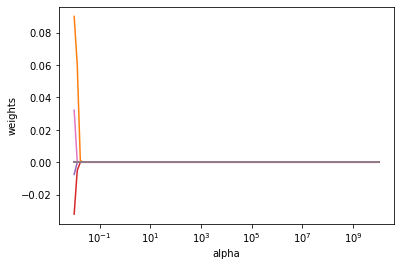

In [268]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [269]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

0.677325657679509

In [270]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)


number_dwellings                   -0.016252
number_habitablerooms              -0.047398
own_radio_Yes                       0.162559
own_television_Yes                  0.000000
own_satelitedish_Yes                0.337009
own_smartphone_Yes                  0.000000
own_refrigerator_Yes                0.000000
own_table_Yes                       0.056796
own_bed_Yes                         0.052352
own_mattress_Yes                    0.024395
own_mosquitonet_Yes                 0.000000
own_fan_Yes                         0.000000
own_bicycle_Yes                     0.077095
own_motorcycle_Yes                  0.000000
own_generator_Yes                   0.000000
own_solarpanels_Yes                -0.000000
own_kerosenestove_Yes               0.077452
own_charcoaljiko_Yes                0.095549
own_wheelbarrow_Yes                 0.047650
own_ironfencing_Yes                -0.000000
own_farmanimals_Yes                -0.000000
headFemale                         -0.000000
shareFemal

In [271]:
Y_test_lasso = lasso.predict(X_test)
Y_test_lasso = pd.Series(Y_test_lasso)

In [272]:
Y_test_lasso = pd.DataFrame(Y_test_lasso, columns=['Y Test Lasso'])
Y_test_lasso
Y_test_lasso.reset_index(drop=True, inplace=True)
Y_test_lasso.head()

,Y Test Lasso
0,7.635325
1,6.729276
2,6.794663
3,6.902330
4,6.754376


In [273]:
y_test = pd.DataFrame(y_test, columns=['log(Total Spend/capita)'])
y_test.reset_index()
y_test.reset_index(drop=True, inplace=True)
y_test.head()

,log(Total Spend/capita)
0,9.011916
1,6.485500
2,7.130928
3,7.928423
4,7.178477


In [274]:
data_lasso = pd.concat([y_test,Y_test_lasso],axis=1)

#rank column-----sort behind scenes and gives order
#divide ranks by the number of rows in the test dataset-----percentiles
#subset 25 percentile rank people true spending rank----how many people ranked outside of 25 on the prediction
data_lasso['true percentile'] = data_lasso['log(Total Spend/capita)'].rank(ascending = True)/data_lasso['log(Total Spend/capita)'].rank(ascending = True).max()
data_lasso['predicted percentile'] = data_lasso['Y Test Lasso'].rank(ascending = True)/data_lasso['Y Test Lasso'].rank(ascending = True).max()
data_lasso['exclusion error'] = np.nan
data_lasso.loc[data_lasso['true percentile'] <= 0.5, data_lasso['exclusion error']] = 0
data_lasso.loc[((data_lasso['true percentile'] <= 0.5) & (data_lasso['predicted percentile'] > 0.5)), data_lasso['exclusion error']] = 1
data_lasso[np.nan].mean() 

#exclusion error - lasso restricted

0.36764705882352944

In [275]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [276]:
#Testing Alphas for Net Elastic Model"
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

for a in alphas:
    model = ElasticNet(alpha= a).fit(X,y)   
    score = model.score(X, y)
    pred_y = model.predict(X)
    mse = mean_squared_error(y, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse)))

/Users/colleenodonnell/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11923043434353531, tolerance: 0.08230128528512223
  positive)


Alpha:0.0001, R2:0.25, MSE:0.57, RMSE:0.75
Alpha:0.0010, R2:0.25, MSE:0.57, RMSE:0.75
Alpha:0.0100, R2:0.22, MSE:0.59, RMSE:0.77
Alpha:0.1000, R2:0.06, MSE:0.71, RMSE:0.84
Alpha:0.3000, R2:0.00, MSE:0.76, RMSE:0.87
Alpha:0.5000, R2:0.00, MSE:0.76, RMSE:0.87
Alpha:0.7000, R2:0.00, MSE:0.76, RMSE:0.87
Alpha:1.0000, R2:0.00, MSE:0.76, RMSE:0.87


In [277]:
#Testing Best Alpha 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),
        'l1_ratio':[.1,.2,.25,.4,.5,.6,.75,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
search.fit(X,y)
search.best_params_ 

{'alpha': 0.001, 'l1_ratio': 0.1}

In [278]:
# Train the model 
e_net= ElasticNet(alpha = 0.01) 
e_net.fit(X_train, y_train) 
  
# calculate the prediction and mean square error 
y_pred_elastic = e_net.predict(X_test) 
mean_squared_error = np.mean((y_pred_elastic - y_test)**2) 
print("Mean Squared Error on test set", mean_squared_error) 
  
e_net_coeff = pd.DataFrame() 
e_net_coeff["Columns"] = X_train.columns 
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_) 
e_net_coeff 

Mean Squared Error on test set 0.6573247271370394


,Columns,Coefficient Estimate
0,number_dwellings,-0.035547
1,number_habitablerooms,-0.082086
2,own_radio_Yes,0.175708
3,own_television_Yes,0.000000
4,own_satelitedish_Yes,0.000000
5,own_smartphone_Yes,0.029221
6,own_refrigerator_Yes,0.000000
7,own_table_Yes,0.083139
8,own_bed_Yes,0.065464
9,own_mattress_Yes,0.054579


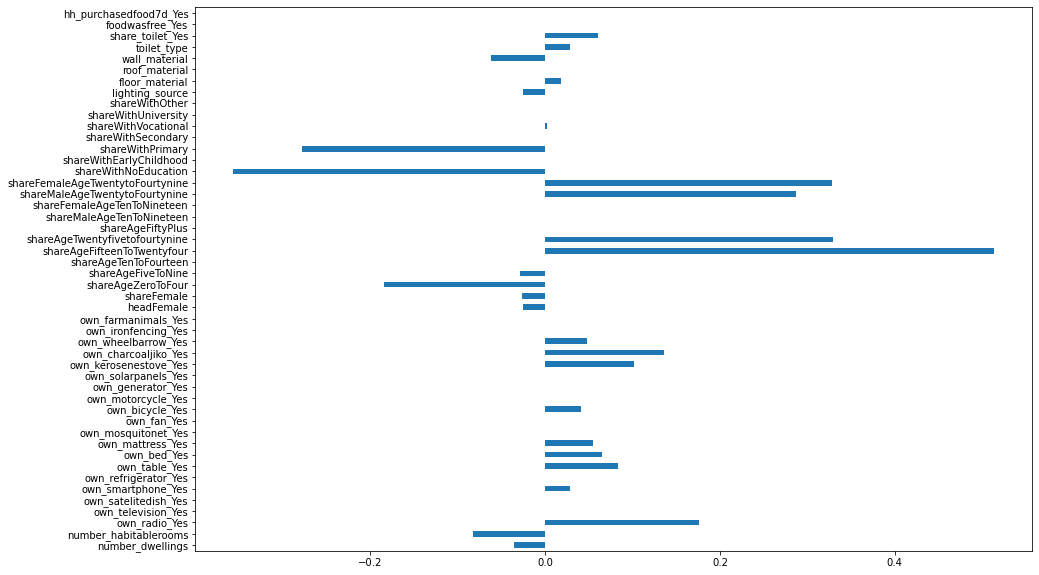

In [279]:
plt.figure(figsize= (15,10))
plt_figure= pd.Series(e_net.coef_, index= X.columns)
plt_figure.plot(kind='barh')
plt.show()

In [280]:
Y_test_elastic = pd.Series(y_pred_elastic)

In [281]:
Y_test_elastic = pd.DataFrame(Y_test_elastic, columns=['Y Test Elastic'])
Y_test_elastic
Y_test_elastic.reset_index(drop=True, inplace=True)
Y_test_elastic.head()

,Y Test Elastic
0,7.747257
1,6.704694
2,6.687111
3,6.844767
4,6.691913


In [282]:
y_test = pd.DataFrame(y_test, columns=['log(Total Spend/capita)'])
y_test.reset_index()
y_test.reset_index(drop=True, inplace=True)
y_test.head()

,log(Total Spend/capita)
0,9.011916
1,6.485500
2,7.130928
3,7.928423
4,7.178477


In [332]:
data_elastic = pd.concat([y_test,Y_test_elastic],axis=1)

#rank column-----sort behind scenes and gives order
#divide ranks by the number of rows in the test dataset-----percentiles
#subset 25 percentile rank people true spending rank----how many people ranked outside of 25 on the prediction
data_elastic['true percentile'] = data_elastic['log(Total Spend/capita)'].rank(ascending = True)/data_elastic['log(Total Spend/capita)'].rank(ascending = True).max()
data_elastic['predicted percentile'] = data_elastic['Y Test Elastic'].rank(ascending = True)/data_elastic['Y Test Elastic'].rank(ascending = True).max()
data_elastic['exclusion error'] = np.nan
data_elastic.loc[data_elastic['true percentile'] <= 0.5, data_elastic['exclusion error']] = 0
data_elastic.loc[((data_elastic['true percentile'] <= 0.5) & (data_elastic['predicted percentile'] > 0.5)), data_elastic['exclusion error']] = 1
data_elastic[np.nan].mean() 

#exclusion error - elastic net restricted

0.3382352941176471

In [284]:
#converting to floats
FinalMerge['number_dwellings'] = FinalMerge['number_dwellings'].astype(float)
FinalMerge['number_habitablerooms'] = FinalMerge['number_habitablerooms'].astype(float)
FinalMerge['share_toilet_Yes'] = FinalMerge['share_toilet_Yes'].astype(float)
FinalMerge['own_radio_Yes'] = FinalMerge['own_radio_Yes'].astype(float)
FinalMerge['own_television_Yes'] = FinalMerge['own_television_Yes'].astype(float)
FinalMerge['own_satelitedish_Yes'] = FinalMerge['own_satelitedish_Yes'].astype(float)
FinalMerge['own_smartphone_Yes'] = FinalMerge['own_smartphone_Yes'].astype(float)
FinalMerge['own_refrigerator_Yes'] = FinalMerge['own_refrigerator_Yes'].astype(float)
FinalMerge['own_table_Yes'] = FinalMerge['own_table_Yes'].astype(float)
FinalMerge['own_bed_Yes'] = FinalMerge['own_bed_Yes'].astype(float)
FinalMerge['own_mattress_Yes'] = FinalMerge['own_mattress_Yes'].astype(float)
FinalMerge['own_mosquitonet_Yes'] = FinalMerge['own_mosquitonet_Yes'].astype(float)
FinalMerge['own_mattress_Yes'] = FinalMerge['own_mattress_Yes'].astype(float)
FinalMerge['own_fan_Yes'] = FinalMerge['own_fan_Yes'].astype(float)
FinalMerge['own_bicycle_Yes'] = FinalMerge['own_bicycle_Yes'].astype(float)
FinalMerge['own_motorcycle_Yes'] = FinalMerge['own_motorcycle_Yes'].astype(float)
FinalMerge['own_generator_Yes'] = FinalMerge['own_generator_Yes'].astype(float)
FinalMerge['own_solarpanels_Yes'] = FinalMerge['own_solarpanels_Yes'].astype(float)
FinalMerge['own_kerosenestove_Yes'] = FinalMerge['own_kerosenestove_Yes'].astype(float)
FinalMerge['own_charcoaljiko_Yes'] = FinalMerge['own_charcoaljiko_Yes'].astype(float)
FinalMerge['own_wheelbarrow_Yes'] = FinalMerge['own_wheelbarrow_Yes'].astype(float)
FinalMerge['own_ironfencing_Yes'] = FinalMerge['own_ironfencing_Yes'].astype(float)
FinalMerge['own_farmanimals_Yes'] = FinalMerge['own_farmanimals_Yes'].astype(float)
FinalMerge['hh_purchasedfood7d_Yes'] = FinalMerge['own_farmanimals_Yes'].astype(float)
FinalMerge['foodwasfree_Yes'] = FinalMerge['own_farmanimals_Yes'].astype(float)

#for own_car variable, all of them were a no, so they were dropped

#Rest of float variables for the unrestricted dataset 
FinalMerge['headFemale'] = FinalMerge['headFemale'].astype(float)
FinalMerge['size'] = FinalMerge['size'].astype(float)
FinalMerge['shareWithEarlyChildhood'] = FinalMerge['shareWithEarlyChildhood'].astype(float)
FinalMerge['issue'] = FinalMerge['issue'].astype(float)
FinalMerge['foodspent_localcurrecny'] = FinalMerge['foodspent_localcurrecny'].astype(float)
FinalMerge['familysize1'] = FinalMerge['familysize1'].astype(float)
FinalMerge['familysize2'] = FinalMerge['familysize2'].astype(float)
FinalMerge['familysize3'] = FinalMerge['familysize3'].astype(float)
FinalMerge['familysize4'] = FinalMerge['familysize4'].astype(float)
FinalMerge['familysize5'] = FinalMerge['familysize5'].astype(float)
FinalMerge['floor_material'] = FinalMerge['floor_material'].astype(float)
FinalMerge['roof_material'] = FinalMerge['roof_material'].astype(float)
FinalMerge['toilet_type'] = FinalMerge['toilet_type'].astype(float)
FinalMerge['lighting_source'] = FinalMerge['lighting_source'].astype(float)
FinalMerge['rentpaid_shillings'] = FinalMerge['rentpaid_shillings'].astype(float)
FinalMerge['relatives_abroad_Yes'] = FinalMerge['relatives_abroad_Yes'].astype(float)
FinalMerge['borrowedfrom_sources12mo_Yes'] = FinalMerge['borrowedfrom_sources12mo_Yes'].astype(float)
FinalMerge['borrowedfrom_bank12mo_Yes'] = FinalMerge['borrowedfrom_bank12mo_Yes'].astype(float)
FinalMerge['borrowedfrom_community_Yes'] = FinalMerge['borrowedfrom_community_Yes'].astype(float)
FinalMerge['borrowedfrom_familyorfriends12mo_Yes'] = FinalMerge['borrowedfrom_familyorfriends12mo_Yes'].astype(float)
FinalMerge['remittances_abroad_Yes'] = FinalMerge['remittances_abroad_Yes'].astype(float)
FinalMerge['purchased_insurance_Yes'] = FinalMerge['purchased_insurance_Yes'].astype(float)
FinalMerge['sellhhgoods_lackfood_Yes'] = FinalMerge['sellhhgoods_lackfood_Yes'].astype(float)
FinalMerge['withdrawchildrenschool_lackfood_Yes'] = FinalMerge['withdrawchildrenschool_lackfood_Yes'].astype(float)
FinalMerge['sellanimals:lackfood_Yes'] = FinalMerge['sellanimals:lackfood_Yes'].astype(float)
FinalMerge['beg_lackfood_Yes'] = FinalMerge['beg_lackfood_Yes'].astype(float)
FinalMerge['drikingwater_source'] = FinalMerge['drikingwater_source'].astype(float)
FinalMerge['crowdindex_room'] = FinalMerge['crowdindex_room'].astype(float)
FinalMerge['LCS_index'] = FinalMerge['LCS_index'].astype(float)
FinalMerge['poorIPL'] = FinalMerge['poorIPL'].astype(float)
FinalMerge['childunder5_death5yrs_Yes'] = FinalMerge['childunder5_death5yrs_Yes'].astype(float)
FinalMerge['sellfemaleanimal_last_Yes'] = FinalMerge['sellfemaleanimal_last_Yes'].astype(float)
FinalMerge['wall_material'] = FinalMerge['wall_material'].astype(float)
FinalMerge['relatives_outsidekenya_Yes'] = FinalMerge['relatives_outsidekenya_Yes'].astype(float)
FinalMerge['own_bankaccount_Yes'] = FinalMerge['own_bankaccount_Yes'].astype(float)
FinalMerge['healthandeduc_reduction_Yes'] = FinalMerge['healthandeduc_reduction_Yes'].astype(float)
FinalMerge['own_bankaccount_Yes'] = FinalMerge['own_bankaccount_Yes'].astype(float)
FinalMerge['sellassets_lackfood_Yes'] = FinalMerge['sellassets_lackfood_Yes'].astype(float)
FinalMerge['borrowmoneyfood_lackfood_Yes'] = FinalMerge['borrowmoneyfood_lackfood_Yes'].astype(float)
FinalMerge['sellhouseland_lackfood_Yes'] = FinalMerge['sellhouseland_lackfood_Yes'].astype(float)
FinalMerge['spendsavings:lackfood_Yes'] = FinalMerge['spendsavings:lackfood_Yes'].astype(float)
FinalMerge['drinkingwater_insufficientquanities_Yes'] = FinalMerge['drinkingwater_insufficientquanities_Yes'].astype(float)
FinalMerge['childunder5_death5yrs'] = FinalMerge['childunder5_death5yrs_Yes'].astype(float)

In [285]:
#would be for unrestricted set
unwanted = FinalMerge.columns[FinalMerge.columns.str.startswith('spend_')]
FinalMerge.drop(unwanted, axis=1, inplace=True)

unwanted2 = FinalMerge.columns[FinalMerge.columns.str.endswith('TotalSpend')]
FinalMerge.drop(unwanted2, axis=1, inplace=True)

unwanted3 = FinalMerge.columns[FinalMerge.columns.str.startswith('q_')]
FinalMerge.drop(unwanted3, axis=1, inplace=True)

unwanted4 = FinalMerge.columns[FinalMerge.columns.str.startswith('totalcost')]
FinalMerge.drop(unwanted4, axis=1, inplace=True)

unwanted5 = FinalMerge.columns[FinalMerge.columns.str.startswith('Dataset')]
FinalMerge.drop(unwanted5, axis=1, inplace=True)

unwanted6 = FinalMerge.columns[FinalMerge.columns.str.startswith('hhsize')]
FinalMerge.drop(unwanted6, axis=1, inplace=True)

unwanted7 = FinalMerge.columns[FinalMerge.columns.str.startswith('s1q2')]
FinalMerge.drop(unwanted7, axis=1, inplace=True)

unwanted8 = FinalMerge.columns[FinalMerge.columns.str.startswith('weight')]
FinalMerge.drop(unwanted8, axis=1, inplace=True)

unwanted9 = FinalMerge.columns[FinalMerge.columns.str.startswith('hhid')]
FinalMerge.drop(unwanted9, axis=1, inplace=True)

unwanted10 = FinalMerge.columns[FinalMerge.columns.str.startswith('popweight')]
FinalMerge.drop(unwanted10, axis=1, inplace=True)

unwanted11 = FinalMerge.columns[FinalMerge.columns.str.startswith('hhlocation')]
FinalMerge.drop(unwanted11, axis=1, inplace=True)

unwanted12 = FinalMerge.columns[FinalMerge.columns.str.startswith('improved_sanitation')]
FinalMerge.drop(unwanted12, axis=1, inplace=True)

unwanted13 = FinalMerge.columns[FinalMerge.columns.str.startswith('improved_water')]
FinalMerge.drop(unwanted13, axis=1, inplace=True)

unwanted14 = FinalMerge.columns[FinalMerge.columns.str.startswith('s1q5')]
FinalMerge.drop(unwanted14, axis=1, inplace=True)

unwanted15 = FinalMerge.columns[FinalMerge.columns.str.startswith('s12q19')]
FinalMerge.drop(unwanted15, axis=1, inplace=True)

unwanted16 = FinalMerge.columns[FinalMerge.columns.str.startswith('s12q20')]
FinalMerge.drop(unwanted16, axis=1, inplace=True)

unwanted17 = FinalMerge.columns[FinalMerge.columns.str.startswith('s12q21')]
FinalMerge.drop(unwanted17, axis=1, inplace=True)

#why are there variables that aren't named?
Remove_extra_vars = FinalMerge.columns[FinalMerge.columns.str.endswith('_No')]
FinalMerge.drop(Remove_extra_vars, axis=1, inplace=True)

Remove_extra_vars2 = FinalMerge.columns[FinalMerge.columns.str.endswith('_nan')]
FinalMerge.drop(Remove_extra_vars2, axis=1, inplace=True)

In [286]:
Unrestricted = pd.DataFrame(FinalMerge)
Unrestricted.head()

,size,headFemale,shareFemale,shareAgeZeroToFour,shareAgeFiveToNine,shareAgeTenToFourteen,shareAgeFifteenToTwentyfour,shareAgeTwentyfivetofourtynine,shareAgeFiftyPlus,shareMaleAgeTenToNineteen,...,borrowmoneyfood_lackfood_Yes,sellhouseland_lackfood_Yes,withdrawchildrenschool_lackfood_Yes,sellanimals:lackfood_Yes,sellfemaleanimal_last_Yes,beg_lackfood_Yes,share_toilet_Yes,childunder5_death5yrs_Yes,Total_Spend,childunder5_death5yrs
0,5.0,1.0,0.800000,0.200000,0.400000,0.200000,0.000000,0.200000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28773.994501,0.0
1,6.0,1.0,0.166667,0.000000,0.000000,0.166667,0.666667,0.166667,0.000000,0.666667,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2984.158150,0.0
2,6.0,1.0,0.833333,0.166667,0.333333,0.333333,0.000000,0.166667,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1782.654090,0.0
3,14.0,1.0,0.714286,0.285714,0.285714,0.142857,0.142857,0.071429,0.071429,0.071429,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2559.810690,0.0
4,2.0,0.0,0.500000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,12906.885089,0.0


In [287]:
y = ln_expenditure_per_capita

x = Unrestricted

In [288]:
Unrestricted = Unrestricted.astype(float)

In [289]:
#ridge - unrestricted
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(x, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(8, 98)

In [290]:
#Perform all three tests with unrestricted set
x_train, x_test , y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [291]:
#cross validation to choose optimal alpha
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(x_train, y_train)
ridgecv.alpha_

#Test MSE w/ optimal alpha
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(x_train, y_train)

Ridge(alpha=0.3, normalize=True)

In [292]:
# Ridge Model - Unrestricted Data Set  
#Fit ridge model w/ optimal alpha 
ridge4.fit(x, y)
pd.Series(ridge.coef_, index = x.columns)

size                        -0.022614
headFemale                  -0.006679
shareFemale                 -0.024441
shareAgeZeroToFour          -0.152188
shareAgeFiveToNine          -0.094946
                               ...   
beg_lackfood_Yes             0.008855
share_toilet_Yes             0.030787
childunder5_death5yrs_Yes   -0.030215
Total_Spend                  0.000021
childunder5_death5yrs       -0.030215
Length: 98, dtype: float64

In [293]:
Y_test_ridge_ur = ridge4.predict(x_test)
Y_test_ridge_ur = pd.Series(Y_test_ridge_ur)

In [294]:
Y_test_ridge_ur = pd.DataFrame(Y_test_ridge_ur, columns=['Y Test Ridge'])
Y_test_ridge_ur
Y_test_ridge_ur.reset_index(drop=True, inplace=True)
Y_test_ridge_ur.head()

,Y Test Ridge
0,8.777367
1,6.234928
2,6.981234
3,7.476583
4,7.376419


In [295]:
y_test = pd.DataFrame(y_test, columns=['log(Total Spend/capita)'])
y_test.reset_index()
y_test.reset_index(drop=True, inplace=True)
y_test.head()

,log(Total Spend/capita)
0,9.011916
1,6.485500
2,7.130928
3,7.928423
4,7.178477


In [330]:
data_ur = pd.concat([y_test,Y_test_ridge_ur],axis=1)


data_ur['true percentile'] = data_ur['log(Total Spend/capita)'].rank(ascending = True)/data_ur['log(Total Spend/capita)'].rank(ascending = True).max()
data_ur['predicted percentile'] = data_ur['Y Test Ridge'].rank(ascending = True)/data_ur['Y Test Ridge'].rank(ascending = True).max()
data_ur['exclusion error'] = np.nan
data_ur.loc[data_ur['true percentile'] <= 0.25, data_ur['exclusion error']] = 0
data_ur.loc[((data_ur['true percentile'] <= 0.25) & (data_ur['predicted percentile'] > 0.25)), data_ur['exclusion error']] = 1
data_ur[np.nan].mean()   

0.14705882352941177

In [297]:
#Lasso - unrestricted
alphas = 10**np.linspace(10,-2,100)*0.5

In [298]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(x_train, y_train)

lasso.set_params(alpha= lassocv.alpha_)
lasso.fit(x_train, y_train)

Lasso(alpha=0.0010605394792862768, max_iter=10000, normalize=True)

In [299]:
pd.Series(lasso.coef_, index= x.columns)

size                        -0.112561
headFemale                  -0.000000
shareFemale                 -0.082216
shareAgeZeroToFour          -0.174115
shareAgeFiveToNine          -0.000000
                               ...   
beg_lackfood_Yes            -0.000000
share_toilet_Yes             0.000000
childunder5_death5yrs_Yes   -0.000000
Total_Spend                  0.000042
childunder5_death5yrs       -0.000000
Length: 98, dtype: float64

In [300]:
Y_test_lasso_ur = lasso.predict(x_test)
Y_test_lasso_ur = pd.Series(Y_test_lasso_ur)

In [301]:
Y_test_lasso_ur = pd.DataFrame(Y_test_lasso_ur, columns=['Y Test Lasso'])
Y_test_lasso_ur
Y_test_lasso_ur.reset_index(drop=True, inplace=True)
Y_test_lasso_ur.head()

,Y Test Lasso
0,8.334149
1,6.283303
2,7.095689
3,7.415849
4,7.240991


In [302]:
y_test = pd.DataFrame(y_test, columns=['log(Total Spend/capita)'])
y_test.reset_index()
y_test.reset_index(drop=True, inplace=True)
y_test.head()

,log(Total Spend/capita)
0,9.011916
1,6.485500
2,7.130928
3,7.928423
4,7.178477


In [333]:
data_lasso_ur = pd.concat([y_test,Y_test_lasso_ur],axis=1)


data_lasso_ur['true percentile'] = data_lasso_ur['log(Total Spend/capita)'].rank(ascending = True)/data_lasso_ur['log(Total Spend/capita)'].rank(ascending = True).max()
data_lasso_ur['predicted percentile'] = data_lasso_ur['Y Test Lasso'].rank(ascending = True)/data_lasso_ur['Y Test Lasso'].rank(ascending = True).max()
data_lasso_ur['exclusion error'] = np.nan
data_lasso_ur.loc[data_lasso_ur['true percentile'] <= 0.5, data_lasso_ur['exclusion error']] = 0
data_lasso_ur.loc[((data_lasso_ur['true percentile'] <= 0.5) & (data_lasso_ur['predicted percentile'] > 0.5)), data_lasso_ur['exclusion error']] = 1
data_lasso_ur[np.nan].mean() 


0.11029411764705882

In [317]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [318]:

elastic=ElasticNet(normalize=True, max_iter = 100000)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),
        'l1_ratio':[.1,.2,.25,.4,.5,.6,.75,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
search.fit(x,y)
search.best_params_

{'alpha': 0.0001, 'l1_ratio': 0.5}

In [319]:
abs(search.best_score_)

0.23771327984954588

In [320]:
# Elastic Model - Unrestricted Dataset 
e_net= ElasticNet(alpha = 0.01, max_iter = 100000) 
e_net.fit(x_train, y_train) 
  
# calculate the prediction and mean square error 
y_pred_elastic = e_net.predict(x_test) 
mean_squared_error = np.mean((y_pred_elastic - y_test)**2) 
  
e_net_coeff = pd.DataFrame() 
e_net_coeff["Columns"] = x_train.columns 
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_) 
e_net_coeff 

,Columns,Coefficient Estimate
0,size,-0.133557
1,headFemale,-0.021965
2,shareFemale,-0.089314
3,shareAgeZeroToFour,-0.102770
4,shareAgeFiveToNine,-0.000000
...,...,...
93,beg_lackfood_Yes,-0.000000
94,share_toilet_Yes,0.000000
95,childunder5_death5yrs_Yes,-0.000000
96,Total_Spend,0.000044


In [321]:
Y_test_elastic_ur = pd.Series(y_pred_elastic)

In [322]:
Y_test_elastic_ur = pd.DataFrame(Y_test_elastic_ur, columns=['Y Test Elastic Net'])
Y_test_elastic_ur
Y_test_elastic_ur.reset_index(drop=True, inplace=True)
Y_test_elastic_ur.head()

,Y Test Elastic Net
0,8.514482
1,6.051731
2,7.072013
3,7.415589
4,7.501650


In [323]:
y_test = pd.DataFrame(y_test, columns=['log(Total Spend/capita)'])
y_test.reset_index()
y_test.reset_index(drop=True, inplace=True)
y_test.head()

,log(Total Spend/capita)
0,9.011916
1,6.485500
2,7.130928
3,7.928423
4,7.178477


In [327]:
data_elastic_ur = pd.concat([y_test,Y_test_elastic_ur],axis=1)


data_elastic_ur['true percentile'] = data_elastic_ur['log(Total Spend/capita)'].rank(ascending = True)/data_elastic_ur['log(Total Spend/capita)'].rank(ascending = True).max()
data_elastic_ur['predicted percentile'] = data_elastic_ur['Y Test Elastic Net'].rank(ascending = True)/data_elastic_ur['Y Test Elastic Net'].rank(ascending = True).max()
data_elastic_ur['exclusion error'] = np.nan
data_elastic_ur.loc[data_elastic_ur['true percentile'] <= 0.25, data_elastic_ur['exclusion error']] = 0
data_elastic_ur.loc[((data_elastic_ur['true percentile'] <= 0.25) & (data_elastic_ur['predicted percentile'] > 0.25)), data_elastic_ur['exclusion error']] = 1
data_elastic_ur[np.nan].mean()     

0.14705882352941177